<a href="https://colab.research.google.com/github/benjaminAd/Sciences-Donnees-Projet/blob/master/FactChecking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [13]:
FK = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ProjetDataSciences/claimskg_result.csv')
FK

,id,text,date,truthRating,ratingName,author,headline,named_entities_claim,named_entities_article,keywords,source,sourceURL,link,language
0,http://data.gesis.org/claimskg/claim_review/c2...,'And the revenue generated by drilling off Vir...,2012-02-15,2,MIXTURE,Jim Moran,Moran says drilling off Virginia's coast will ...,"Alaska,American Petroleum Institute,Atlantic O...",NaN,"Energy,State Finances",politifact,http://www.politifact.com,http://www.politifact.com/virginia/statements/...,English
1,http://data.gesis.org/claimskg/claim_review/1e...,Health insurance companies pay CEOs $24 millio...,2009-09-15,2,MIXTURE,Health Care for America Now,Health care advocacy group blasts insurers for...,"Aetna,Assurant,Bloomberg News,Cigna,Coventry H...",NaN,"Corporations,Health Care",politifact,http://www.politifact.com,http://www.politifact.com/truth-o-meter/statem...,English
2,http://data.gesis.org/claimskg/claim_review/0b...,Ted Cruz said that veterans should start selli...,Unknown,1,FALSE,Unknown,Ted Cruz: Vets Should Sell Cookies for Funding...,"David Nelson,James Morrison,John Scalzi,Republ...",Ted Cruz,"ASP Article, Not Necessarily The News",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/cruz-cookies/,English
3,http://data.gesis.org/claimskg/claim_review/a1...,Passengers on an airliner diverted to Cuba tho...,Unknown,2,MIXTURE,Unknown,Did Airline Passengers Mistake a Hijacking for...,"Allen Funt,Associated Press,CBS,Candid Camera,...","Allen Funt,Candid Camera,Cuba","Broadcast Legends, Radio & TV, Television",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/candid-camer...,English
4,http://data.gesis.org/claimskg/claim_review/b4...,Oil money from federal leases 'can only be use...,2009-06-15,2,MIXTURE,Bill Nelson,Sen. Bill Nelson says offshore drilling won't ...,"Alabama,Bill Nelson,D-Fla,Florida Panhandle,Gu...",NaN,Environment,politifact,http://www.politifact.com,http://www.politifact.com/truth-o-meter/statem...,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,http://data.gesis.org/claimskg/claim_review/e3...,Actress Jamie Lee Curtis acknowledged in an in...,Unknown,1,FALSE,Unknown,Jamie Lee Curtis: Male and Female?,"Anne Fausto-Sterling,Atlantic Ocean,Jamie Lee ...",Jamie Lee Curtis,"Actors, Movies",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/jamie-lee-cu...,English
9996,http://data.gesis.org/claimskg/claim_review/ad...,"In the past year, DeKalb has 'attracted and re...",2015-01-22,2,MIXTURE,Lee May,DeKalb jobs claim needs some refining,"DeKalb County,Emory University,Goizueta Busine...",NaN,"Economy,Jobs",politifact,http://www.politifact.com,http://www.politifact.com/georgia/statements/2...,English
9997,http://data.gesis.org/claimskg/claim_review/05...,Says Minnesota is 'imprisoning half as many pe...,2018-07-06,2,MIXTURE,Mike McCabe,Mike McCabe says Minnesota is imprisoning half...,"Alabama,FBI,Michael Tonry,Missouri,PolitiFact,...",NaN,"Criminal Justice,States",politifact,http://www.politifact.com,http://www.politifact.com/wisconsin/statements...,English
9998,http://data.gesis.org/claimskg/claim_review/98...,"The state of Georgia has lost 200,000 total jo...",2012-07-17,3,TRUE,Kasim Reed,The mayor gets the numbers right on jobs lost,"Atlanta Journal-Constitution,Bureau of Labor S...",NaN,Transportation,politifact,http://www.politifact.com,http://www.politifact.com/georgia/statements/2...,English


In [14]:
FK.columns

Index(['id', 'text', 'date', 'truthRating', 'ratingName', 'author', 'headline',
       'named_entities_claim', 'named_entities_article', 'keywords', 'source',
       'sourceURL', 'link', 'language'],
      dtype='object')

In [15]:
FK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      10000 non-null  object
 1   text                    10000 non-null  object
 2   date                    10000 non-null  object
 3   truthRating             10000 non-null  int64 
 4   ratingName              10000 non-null  object
 5   author                  10000 non-null  object
 6   headline                10000 non-null  object
 7   named_entities_claim    9989 non-null   object
 8   named_entities_article  6407 non-null   object
 9   keywords                9439 non-null   object
 10  source                  10000 non-null  object
 11  sourceURL               10000 non-null  object
 12  link                    10000 non-null  object
 13  language                10000 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [16]:
def num_missing(x):
    return sum(x.isnull())

In [17]:
print("Valeurs manquantes par colonne:")
print(FK.apply(num_missing, axis=0))

Valeurs manquantes par colonne:
id                           0
text                         0
date                         0
truthRating                  0
ratingName                   0
author                       0
headline                     0
named_entities_claim        11
named_entities_article    3593
keywords                   561
source                       0
sourceURL                    0
link                         0
language                     0
dtype: int64


In [18]:
for i in FK.columns:
    x = FK[i].value_counts()

In [19]:
for i in FK.columns:
    x = FK[i].value_counts()
    print("Column name is:",i,"and it value is:\n",x)
    print()

Column name is: id and it value is:
 http://data.gesis.org/claimskg/claim_review/48c970fa-1bc0-5407-80d1-d37c45e8743d    8
http://data.gesis.org/claimskg/claim_review/ab783345-9254-5f96-ac66-981a5a7fb0c2    8
http://data.gesis.org/claimskg/claim_review/c46332e1-f480-53c3-90c5-ea9b96d7be7d    7
http://data.gesis.org/claimskg/claim_review/502a9383-3714-52f2-9443-25b5abfd824d    3
http://data.gesis.org/claimskg/claim_review/7796c8f1-126d-5fee-8529-2bb53565ac26    2
                                                                                   ..
http://data.gesis.org/claimskg/claim_review/3bdbc745-ede6-54f9-999a-26d1c29099c7    1
http://data.gesis.org/claimskg/claim_review/7c5b23e6-3a98-5e56-8717-a556cca6742e    1
http://data.gesis.org/claimskg/claim_review/b0689aa5-e48b-5550-b1a4-b93c0ecd7a5d    1
http://data.gesis.org/claimskg/claim_review/01c918a7-8b14-566e-a040-f46e25e04c39    1
http://data.gesis.org/claimskg/claim_review/7789899e-a9db-5b1d-bf0b-a84496dffd07    1
Name: id, Length:

In [20]:
FK.groupby(['source', 'ratingName']).size().reset_index(name='counts')

,source,ratingName,counts
0,africacheck,FALSE,88
1,africacheck,TRUE,44
2,checkyourfact,MIXTURE,1
3,factscan,FALSE,13
4,factscan,TRUE,10
5,politifact,FALSE,1775
6,politifact,MIXTURE,3196
7,politifact,TRUE,861
8,snopes,FALSE,2501
9,snopes,MIXTURE,701


In [21]:
FK.groupby(['source', 'author','ratingName']).size().reset_index(name='counts')

,source,author,ratingName,counts
0,africacheck,Unknown,FALSE,88
1,africacheck,Unknown,TRUE,44
2,checkyourfact,Unknown,MIXTURE,1
3,factscan,Andrew Scheer,TRUE,1
4,factscan,Arnold Viersen,FALSE,1
...,...,...,...,...
2803,snopes,Unknown,MIXTURE,701
2804,snopes,Unknown,TRUE,639
2805,truthorfiction,Unknown,FALSE,81
2806,truthorfiction,Unknown,MIXTURE,30


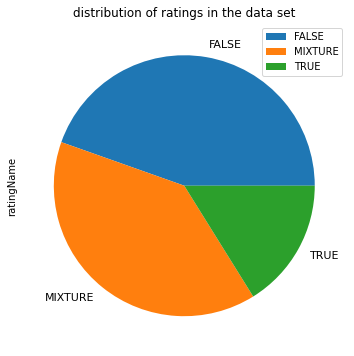

In [22]:
#distribution des rating sur l'ensemble du csv.
FK['ratingName'].value_counts().plot(kind='pie',figsize=(6,6),title='distribution of ratings in the data set',fontsize=11,legend=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


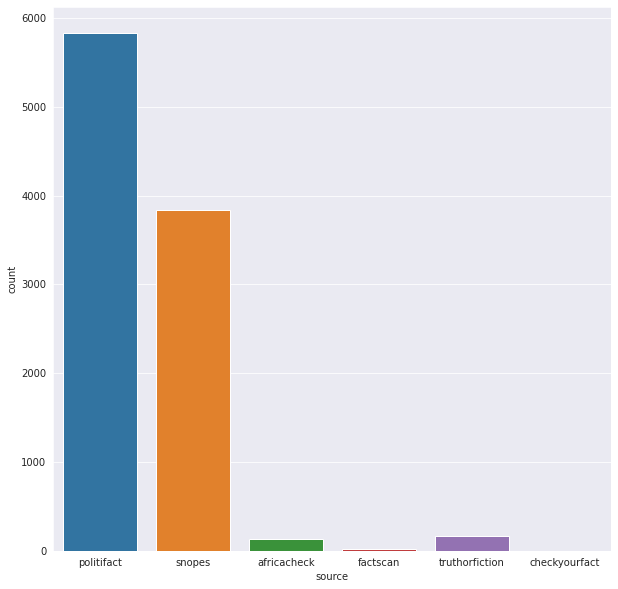

In [23]:
#distribution des claims sur l'ensemble des sites
import matplotlib.pyplot as plt
FK['source'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(FK['source']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


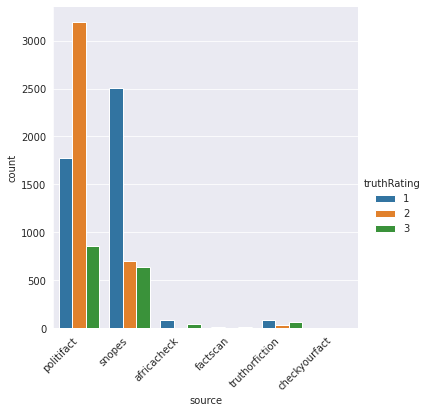

In [24]:
#distribution des labels de véracité sur l'ensemble des sites
chart = sns.catplot('source', data = FK, hue = 'truthRating', kind= 'count')
for ax in chart.axes.ravel():
    plt.setp(ax.get_xticklabels(), rotation = 45, horizontalalignment ="right")
plt.show()

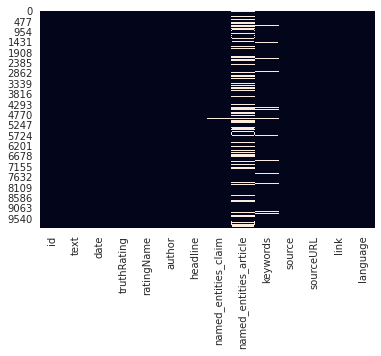

In [25]:
#visualisation des colonnes avec des lignes vides.
sns.heatmap(FK.isnull(), cbar=False)


In [26]:
#suppression des claims en provenance de sites Français
FK_1=FK[FK.source != 'checkyourfact']
#ajustement des indexes
FK_1.reset_index(drop=True, inplace=True)

In [27]:
#remplacement des valeurs manquantes dans la colonne keywords par "unknown".
FK_1['keywords'].fillna("unknown", inplace=True)
FK_1['named_entities_claim'].fillna("", inplace=True)
FK_1['named_entities_article'].fillna(" ", inplace=True)
#Suppression des colonnes inutiles
FK_2=FK_1.drop(columns=['id','date','ratingName' , 'sourceURL','link','language'])
FK_2

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,text,truthRating,author,headline,named_entities_claim,named_entities_article,keywords,source
0,'And the revenue generated by drilling off Vir...,2,Jim Moran,Moran says drilling off Virginia's coast will ...,"Alaska,American Petroleum Institute,Atlantic O...",,"Energy,State Finances",politifact
1,Health insurance companies pay CEOs $24 millio...,2,Health Care for America Now,Health care advocacy group blasts insurers for...,"Aetna,Assurant,Bloomberg News,Cigna,Coventry H...",,"Corporations,Health Care",politifact
2,Ted Cruz said that veterans should start selli...,1,Unknown,Ted Cruz: Vets Should Sell Cookies for Funding...,"David Nelson,James Morrison,John Scalzi,Republ...",Ted Cruz,"ASP Article, Not Necessarily The News",snopes
3,Passengers on an airliner diverted to Cuba tho...,2,Unknown,Did Airline Passengers Mistake a Hijacking for...,"Allen Funt,Associated Press,CBS,Candid Camera,...","Allen Funt,Candid Camera,Cuba","Broadcast Legends, Radio & TV, Television",snopes
4,Oil money from federal leases 'can only be use...,2,Bill Nelson,Sen. Bill Nelson says offshore drilling won't ...,"Alabama,Bill Nelson,D-Fla,Florida Panhandle,Gu...",,Environment,politifact
...,...,...,...,...,...,...,...,...
9994,Actress Jamie Lee Curtis acknowledged in an in...,1,Unknown,Jamie Lee Curtis: Male and Female?,"Anne Fausto-Sterling,Atlantic Ocean,Jamie Lee ...",Jamie Lee Curtis,"Actors, Movies",snopes
9995,"In the past year, DeKalb has 'attracted and re...",2,Lee May,DeKalb jobs claim needs some refining,"DeKalb County,Emory University,Goizueta Busine...",,"Economy,Jobs",politifact
9996,Says Minnesota is 'imprisoning half as many pe...,2,Mike McCabe,Mike McCabe says Minnesota is imprisoning half...,"Alabama,FBI,Michael Tonry,Missouri,PolitiFact,...",,"Criminal Justice,States",politifact
9997,"The state of Georgia has lost 200,000 total jo...",3,Kasim Reed,The mayor gets the numbers right on jobs lost,"Atlanta Journal-Constitution,Bureau of Labor S...",,Transportation,politifact


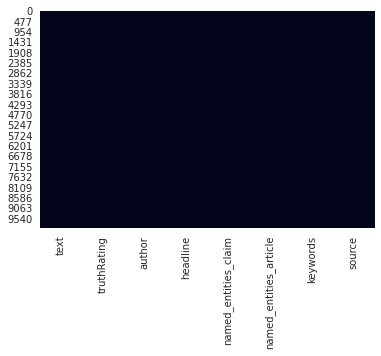

In [28]:
#visualisation des colonnes avec des lignes vides.
sns.heatmap(FK_2.isnull(), cbar=False)

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [31]:
#application des classifieurs sans pré-traitements sur les lignes TRUE et FALSE
FK_test=FK_2[(FK_2.truthRating!= -1) & (FK_2.truthRating != 2)]
#ajustement des indexes
FK_test.reset_index(drop=True, inplace=True)
vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(FK_test['text'].values).toarray()
y=FK_test['truthRating']

In [ ]:
scoring = 'accuracy'
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFO', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR', LogisticRegression()))
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [ ]:
#application des classifieurs sans pré-traitements sur les lignes TRUE et FALSE
FK_test=FK_2[(FK_2.truthRating!= 1) & (FK_2.truthRating != 2)]
#ajustement des indexes
FK_test.reset_index(drop=True, inplace=True)
vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(FK_test['text'].values).toarray()
y=FK_test['truthRating']

In [ ]:
import nltk
from nltk import word_tokenize , sent_tokenize
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
stop_words = stopwords.words('english')

In [ ]:
def nettoyageTexte(claim):
    wordnet_lemmatizer = WordNetLemmatizer()
    #claim =contractions.fix(claim)
    tokens=word_tokenize(claim)
    abrev=re.findall(r"\b[A-Z]{2,}\b", claim)
    tokens=[token for token in tokens if token not in abrev]

    tokens = [w.lower() for w in tokens]
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in tokens]
    tokens = [token for token in tokens if not(token.isdigit())]
    text="".join([" "+i for i in tokens])
    return text

In [ ]:
def nettoyageFeatures(ft):
    feature=str(ft)
    f= ""
    feature= feature.lower()
    if feature == "unknown":
        return ""
    feature=feature.replace("," , " ")
    tokens=word_tokenize(feature)
    abrev=re.findall(r"\b[A-Z]{2,}\b", feature)
    tokens=[token for token in tokens if token not in abrev]
    #tokens = [w.lower() for w in tokens]
    feat= [i for i in tokens if i.isalpha() and len(i)>1]
    feat = [w for w in feat if not w in stop_words]
    for fe in feat:
        if fe not in f:
            f+= " " + fe
    return f

In [ ]:
def training_set(target, df,text, feature, source=True):

    vectorizer = TfidfVectorizer(min_df = 0.0015, max_df=0.5, ngram_range=(1,3))
    vector = CountVectorizer()

#encodage de la colonne source avec one hot encoder.
    df= pd.get_dummies(df,columns=['source'],prefix = ['Site_'])
    d=df.drop(columns=['text', 'author','headline', 'named_entities_claim', 'named_entities_article', 'keywords'])

    src = d[[c for c in d.columns if c != target]]

#Le texte (keywords/ headline) est codé avec la matrice Tfidf
    claimsVectorized=vectorizer.fit_transform(text)
    dfC=pd.DataFrame(claimsVectorized.toarray(), columns=vectorizer.get_feature_names())
    if source :
#Tandis que pour les features,si c'est des noms d'entités : nous avons choisi l'encodage avec le countVectorizer
#Sinon, si des c'est des mots clés, alors on les concatène avec le text
        if len(feature) !=0:
                 featuresVectorized=vector.fit_transform(feature)
                 dfF = pd.DataFrame(featuresVectorized.toarray(), columns=vector.get_feature_names())
                 r= pd.concat([src,dfC, dfF], axis=1)
        else:
 #On concatène l'ensemble des encodages
               r = pd.concat([src, dfC], axis=1)
        X = r.values

    else:
               X=claimsVectorized.toarray()

    y= d[target]


 #upsampling car les classes true et false sont trop déséquilibrées.
    counter = Counter(y)
    smote = SMOTE()
    X_sm, y_sm = smote.fit_resample(X, y)
    counter = Counter(y_sm)
    return X_sm, y_sm


In [ ]:
def classificationPourcentage(clf, X, y, validation_size):
    testsize= 1-validation_size
    seed=30
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=validation_size,random_state=seed,test_size=testsize)

    clf.fit(X_train, y_train)
    result = clf.predict(X_test)
    print('\n accuracy avec train_test_split :',
    accuracy_score(result, y_test),'\n')
    print("------------------------------------")
    conf = confusion_matrix(y_test, result)
    print ('\n matrice de confusion \n',conf)
    print("-----------------------------------")
    print ('\n',classification_report(y_test, result))
    print("-----------------------------------")


In [ ]:
def classification_KFold(clf, x, y):
        k_fold = KFold(n_splits=10, random_state=None, shuffle=True)

        clf.fit(x, y)

        r = {"clf": clf, "k_fold": k_fold}

        return r

In [ ]:
def scoring_classification(clf, k_fold, x, y):
    score = cross_val_score(clf, x, y, cv=k_fold, scoring='accuracy')
    print('\n Les différentes accuracy pour les 10 évaluations sont :')
    print(score)
    print ('\n Accuracy moyenne :', score.mean())
    print('\n standard deviation', score.std())

    return score.mean()


In [ ]:
import pandas as pd
import numpy as np
import re
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from nltk import word_tokenize , sent_tokenize
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import import_ipynb
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import imblearn
import contractions
import collections
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import warnings
import copy
import pickle
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:
data = {"text_nettoye": [],"keywords": [],"named_entities_article": [],"named_entities_claim": [],"author":[]}
features=[]
for index,row in FK_test.iterrows():
    data['text_nettoye'].append(nettoyageTexte(row["text"]+row["headline"]))
    data['keywords'].append(nettoyageFeatures(row['keywords']))
    data['named_entities_article'].append(nettoyageFeatures(row['named_entities_article']))
    data['named_entities_claim'].append(nettoyageFeatures(row['named_entities_claim']))
    data['author'].append(nettoyageFeatures(row['author']))
    FK_temp = pd.DataFrame(data)
    vectorizer = TfidfVectorizer(min_df = 0.0015, max_df=0.5, ngram_range=(1,3))
    vector = CountVectorizer()
    class_label_encoder = LabelEncoder()
    y=FK_test['truthRating']
    v = {"classifiers":['RFO','SVM', 'LR'],
         "text_nettoye": [],
         "keywords": [],
         "named_entities_article": [],
         "named_entities_claim": [],
         "author":[]
        }
    for key in data.keys():
        if key=="keywords" or key=="text_nettoye":
            X=vectorizer.fit_transform(FK_temp[key].values).toarray()

        else:
            X=vector.fit_transform(df_temp[key].values).toarray()
    for result in classi:
        r=classification_KFold(result.parameters, X, y)
        v[key].append(scoring_classification(r['clf'], r['k_fold'], X, y))
score_obtenu= pd.DataFrame(v)
display(score_obtenu)
